# BSF Project: Price Range Time Series Data
## Daniel You

## Part 1. EDA

### 1.1 Load and Clean up Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA

In [89]:
# Load .csv file
df = pd.read_csv ('cec_price.csv')

# Change the dollar amounts to integers
for i in range(17):
    df[df.columns[i+1]] = df[df.columns[i+1]].str.replace('$', '')
    df[df.columns[i+1]] = df[df.columns[i+1]].str.replace(',', '').astype('float')

# Dataframe with NaN
df_nan = df

# Change NaN value to 0
df = df.fillna(0)

df

,Class,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031
0,Car-Compact,36614.0,36108.0,35603.0,34430.0,35598.0,41020.0,34491.0,33348.0,32319.0,31389.0,30548.0,29784.0,29089.0,28455.0,27876.0,27252.0,26645.0
1,Car-Large,81015.0,81015.0,92035.0,90233.0,86539.0,82443.0,67215.0,65438.0,63845.0,62415.0,61129.0,59972.0,58929.0,57989.0,57140.0,56280.0,55432.0
2,Car-Midsize,0.0,0.0,52328.0,51817.0,47582.0,43511.0,42139.0,40509.0,39052.0,37749.0,36582.0,35536.0,34597.0,33753.0,32995.0,32218.0,31472.0
3,Car-Sport,0.0,0.0,0.0,0.0,0.0,150900.0,119401.0,110408.0,110985.0,109363.0,107843.0,106212.0,104667.0,103118.0,101818.0,100434.0,99069.0
4,Car-Subcompact,34970.0,34832.0,42092.0,40561.0,40515.0,37695.0,35059.0,33477.0,32940.0,32441.0,31975.0,31538.0,31126.0,30736.0,30366.0,29921.0,29483.0
5,Cross/Ut-Midsize,0.0,79147.0,100816.0,100816.0,77225.0,74582.0,72474.0,70582.0,68883.0,67354.0,65977.0,64735.0,63613.0,62599.0,61680.0,60753.0,59839.0
6,Cross/Ut-Small-Car,85420.0,83520.0,80910.0,0.0,0.0,0.0,71756.0,69883.0,68201.0,66688.0,65324.0,64094.0,62984.0,61979.0,61070.0,60151.0,59246.0
7,Cross/Ut-Small-Trk,47143.0,0.0,0.0,0.0,74800.0,80900.0,74052.0,72120.0,70383.0,68822.0,67415.0,66145.0,64999.0,63962.0,63024.0,62076.0,61142.0
8,Pickup-Compact,0.0,0.0,0.0,0.0,0.0,0.0,69000.0,68310.0,67627.0,66951.0,66281.0,65618.0,64962.0,64313.0,63669.0,63033.0,62402.0
9,"Pickup-Heavy(8,500-10,000)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,87500.0,85750.0,84035.0,82354.0,80707.0,79093.0,77511.0,75961.0,74442.0,72953.0


In [90]:
# Get the last price for each categories of cars
a = np.array(list(df['2031']))
p_33 = np.percentile(a,33.33)
p_66 = np.percentile(a,66.66)

# Crate a new column to determine what categories of Class will be in which bucket
df['cat'] = pd.cut(df['2031'], [0, p_33, p_66, np.inf], labels=['low', 'medium', 'high'])
df_nan['cat'] = pd.cut(df_nan['2031'], [0, p_33, p_66, np.inf], labels=['low', 'medium', 'high'])

### 1.2 Find Each Price Categories' Average Value from 2017 to 2031

In [91]:
# I had to drop 2015 and 2016 because of incomplete data
df_nan = df_nan.drop(['2015','2016'], axis=1)
grouped_df = df_nan.groupby("cat")
mean_df = grouped_df.mean()
mean_df

,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031
cat,,,,,,,,,,,,,,,
low,38847.5,37495.5,39226.0,40171.666667,37102.00,34147.75,33338.000000,32299.6,31373.000000,30521.2,29721.6,28991.4,28329.200000,27653.600000,26989.800000
medium,75091.0,71025.0,67060.5,62977.000000,62561.60,60930.00,60032.333333,59014.0,58110.833333,55413.0,54424.5,53521.5,52703.166667,51899.666667,51111.166667
high,100816.0,100816.0,76012.5,102127.333333,83731.75,81784.00,80725.600000,79305.0,77974.000000,76683.4,75466.8,74300.6,73230.400000,72147.600000,71081.000000


### 1.3 Plot the Three Classes

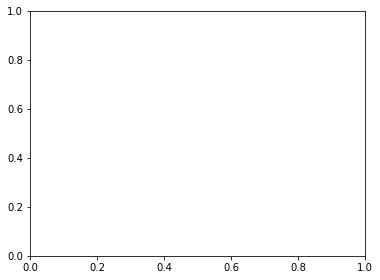

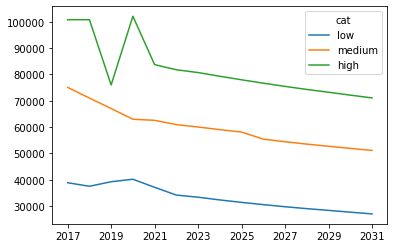

In [92]:
nice = mean_df.T
fig, ax = plt.subplots(figsize=(6, 4.5))
nice.plot()

## 2. Forecast Sales Price for Low, Medium, and High 

### 2.1 ARIMA for Low Sales Price

In [93]:
stepwise_fit = auto_arima(nice['low'],trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=241.894, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=244.219, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=243.851, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=245.674, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=245.531, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.386 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   15
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -118.947
Date:                Fri, 09 Apr 2021   AIC                            241.894
Time:                        16:15:53   BIC                            243.172
Sample:                             0   HQIC                           241.776
                                 - 15                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -846.9786    317.304     -2.669      0.008   -1468.883    -225.074
sigma2      1.404e+06   4.68e+05      2.997      0.003    4.86e+05    2.32e+06
===================================================================================
Ljung-Box (Q):                        6.61   Jarque-Bera (JB):                 0.22
Prob(Q):                              0.92   Prob(JB):                         0.90
Heteroskedasticity (H):               0.01   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [94]:
mod = ARIMA(nice['low'],order=(0,1,0))
results = mod.fit()
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.low   No. Observations:                   14
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -118.947
Method:                           css   S.D. of innovations           1184.733
Date:                Fri, 09 Apr 2021   AIC                            241.894
Time:                        16:15:53   BIC                            243.172
Sample:                    01-01-2018   HQIC                           241.776
                         - 01-01-2031                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -846.9786    316.633     -2.675      0.007   -1467.568    -226.389


* P-value is statistically significant

In [95]:
n=4
forecast,err,ci = results.forecast(steps=n)
df_forecast = pd.DataFrame({'forecast':forecast},index=pd.date_range(start='2032', periods=n, freq='Y'))

In [96]:
df_forecast['lower'] = ci[:,0]
df_forecast['upper'] = ci[:,1]

In [97]:
df_forecast_low = df_forecast['forecast']

In [98]:
df_forecast_low

2032-12-31    26142.821429
2033-12-31    25295.842857
2034-12-31    24448.864286
2035-12-31    23601.885714
Freq: A-DEC, Name: forecast, dtype: float64

### 2.2 ARIMA for Medium Sales Price

In [99]:
stepwise_fit = auto_arima(nice['medium'],trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=244.799, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=244.897, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=247.038, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=243.378, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=256.734, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=243.058, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=238.287, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=245.214, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=228.698, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=229.630, Time=0.06 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=229.494, Time=0.05 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=225.746, Time=0.08 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=nan 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   15
Model:               SARIMAX(3, 1, 2)   Log Likelihood                -105.873
Date:                Fri, 09 Apr 2021   AIC                            225.746
Time:                        16:15:56   BIC                            230.219
Sample:                             0   HQIC                           225.332
                                 - 15                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1806.3744    655.380     -2.756      0.006   -3090.896    -521.853
ar.L1         -0.3746      0.398     -0.941      0.347      -1.155       0.405
ar.L2          0.1422      0.285      0.499      0.618      -0.416       0.701
ar.L3         -0.1860      0.248     -0.751      0.453      -0.672       0.300
ma.L1          0.1325      0.494      0.268      0.789      -0.836       1.100
ma.L2         -0.4418      0.556     -0.795      0.427      -1.531       0.648
sigma2      2.712e+05   1.58e+05      1.713      0.087   -3.91e+04    5.81e+05
===================================================================================
Ljung-Box (Q):                        6.05   Jarque-Bera (JB):                 0.43
Prob(Q):                              0.94   Prob(JB):                         0.81
Heteroskedasticity (H):               8.72   Skew:                            -0.43
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [100]:
mod = ARIMA(nice['medium'],order=(0,1,0))
results = mod.fit()
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:               D.medium   No. Observations:                   14
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -120.449
Method:                           css   S.D. of innovations           1318.871
Date:                Fri, 09 Apr 2021   AIC                            244.897
Time:                        16:15:56   BIC                            246.175
Sample:                    01-01-2018   HQIC                           244.779
                         - 01-01-2031                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1712.8452    352.483     -4.859      0.000   -2403.700   -1021.991


* P-value is statistically significant

In [101]:
# Range of reach forecast can have
n=4
forecast,err,ci = results.forecast(steps=n)
df_forecast = pd.DataFrame({'forecast':forecast},index=pd.date_range(start='2032', periods=n, freq='Y'))

# Get the confidence intervals
df_forecast['lower'] = ci[:,0]
df_forecast['upper'] = ci[:,1]

# Forecast value
df_forecast_med = df_forecast['forecast']

df_forecast_med

2032-12-31    49398.321429
2033-12-31    47685.476190
2034-12-31    45972.630952
2035-12-31    44259.785714
Freq: A-DEC, Name: forecast, dtype: float64

### 2.3 ARIMA for High Sales Price

In [102]:
stepwise_fit = auto_arima(nice['high'],trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=303.394, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=309.056, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=306.266, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=301.973, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.300 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   15
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -149.987
Date:                Fri, 09 Apr 2021   AIC                            301.973
Time:                        16:15:58   BIC                            302.612
Sample:                             0   HQIC                           301.914
                                 - 15                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.102e+08   2.78e+07      3.968      0.000    5.57e+07    1.65e+08
===================================================================================
Ljung-Box (Q):                       10.28   Jarque-Bera (JB):                 3.66
Prob(Q):                              0.67   Prob(JB):                         0.16
Heteroskedasticity (H):               0.00   Skew:                             0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [103]:
mod = ARIMA(nice['high'],order=(0,1,1))
results = mod.fit()
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.high   No. Observations:                   14
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -143.575
Method:                       css-mle   S.D. of innovations           6245.883
Date:                Fri, 09 Apr 2021   AIC                            293.149
Time:                        16:15:59   BIC                            295.066
Sample:                    01-01-2018   HQIC                           292.972
                         - 01-01-2031                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1939.6976    373.263     -5.197      0.000   -2671.279   -1208.117
ma.L1.D.high    -1.0000      0.205     -4.870      0.000      -1.402      -0.598
                                    Roots   

* P-value is statistically significant

In [104]:
# Range of reach forecast can have
n=4
forecast,err,ci = results.forecast(steps=n)
df_forecast = pd.DataFrame({'forecast':forecast},index=pd.date_range(start='2032', periods=n, freq='Y'))

# Get the confidence intervals
df_forecast['lower'] = ci[:,0]
df_forecast['upper'] = ci[:,1]

# Forecast value
df_forecast_high = df_forecast['forecast']

df_forecast_high

2032-12-31    66021.219016
2033-12-31    64081.521431
2034-12-31    62141.823846
2035-12-31    60202.126260
Freq: A-DEC, Name: forecast, dtype: float64

## 3. Create a New Dataframe

In [109]:
# Years that will be added on for index
lis = [x for x in range(2032,2036)]

# Forecast in a well structured series
low_new = pd.Series(df_forecast_low.values.tolist(), index=lis)
med_new = pd.Series(df_forecast_med.values.tolist(), index=lis)
high_new = pd.Series(df_forecast_high.values.tolist(), index=lis)

# Concat Series together
df_new = pd.concat([low_new, med_new, high_new], axis=1)

# Rename the columns
df_new = df_new.rename(columns={0: 'low', 1:'medium', 2:'high'})

# Add current the forecast dataframe to original dataframe
frames = [nice,df_new]
result = pd.concat(frames)

result

,low,medium,high
2017,38847.500000,75091.000000,100816.000000
2018,37495.500000,71025.000000,100816.000000
2019,39226.000000,67060.500000,76012.500000
2020,40171.666667,62977.000000,102127.333333
2021,37102.000000,62561.600000,83731.750000
2022,34147.750000,60930.000000,81784.000000
2023,33338.000000,60032.333333,80725.600000
2024,32299.600000,59014.000000,79305.000000
2025,31373.000000,58110.833333,77974.000000
2026,30521.200000,55413.000000,76683.400000


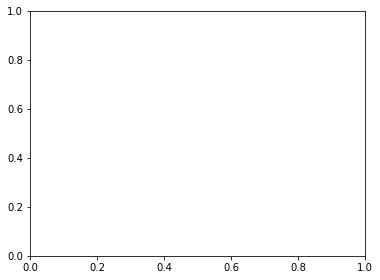

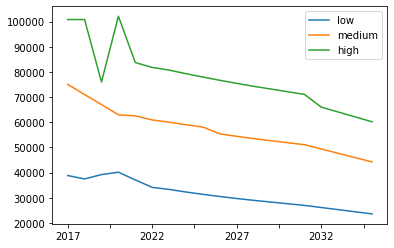

In [110]:
# Plot the new dataframe
fig, ax = plt.subplots(figsize=(6, 4.5))
result.plot()

In [111]:
# Save as a new .csv file
result.to_csv ('cec_price_range.csv', index = True, header=True)